# Roller Coaster

## Project Requirements

1. Roller coasters are thrilling amusement park rides designed to make you squeal and scream! They take you up high, drop you to the ground quickly, and sometimes even spin you upside down before returning to a stop. Today you will be taking control back from the roller coasters and visualizing data covering international roller coaster rankings and roller coaster statistics.

   Roller coasters are often split into two main categories based on their construction material: **wood** or **steel**. Rankings for the best wood and steel roller coasters from the 2013 to 2018 [Golden Ticket Awards](http://goldenticketawards.com) are provded in `'Golden_Ticket_Award_Winners_Wood.csv'` and `'Golden_Ticket_Award_Winners_Steel.csv'`, respectively. Load each csv into a DataFrame and inspect it to gain familiarity with the data.

In [1]:
# 1
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
# load rankings data
wood_rollercoasters = pd.read_csv('Golden_Ticket_Award_Winners_Wood.csv')
# load rankings data
steel_rollercoasters = pd.read_csv('Golden_Ticket_Award_Winners_Steel.csv')

# Preliminary EDA

print(wood_rollercoasters.head())
print(wood_rollercoasters.shape)
print(steel_rollercoasters.shape)
print(wood_rollercoasters['Supplier'].nunique())
print(steel_rollercoasters['Supplier'].nunique())
print(wood_rollercoasters.groupby(['Year of Rank'])['Name'].count())
print(steel_rollercoasters.groupby(['Year of Rank'])['Name'].count())

   Rank          Name                       Park             Location  \
0     1  Boulder Dash             Lake Compounce       Bristol, Conn.   
1     2       El Toro  Six Flags Great Adventure        Jackson, N.J.   
2     3       Phoenix  Knoebels Amusement Resort        Elysburg, Pa.   
3     4    The Voyage              Holiday World    Santa Claus, Ind.   
4     5   Thunderhead                  Dollywood  Pigeon Forge, Tenn.   

           Supplier  Year Built  Points  Year of Rank  
0               CCI        2000    1333          2013  
1           Intamin        2006    1302          2013  
2  Dinn/PTC-Schmeck        1985    1088          2013  
3     Gravity Group        2006    1086          2013  
4              GCII        2004     923          2013  
(180, 8)
(180, 8)
32
15
Year of Rank
2013    10
2014    10
2015    10
2016    50
2017    50
2018    50
Name: Name, dtype: int64
Year of Rank
2013    10
2014    10
2015    10
2016    50
2017    50
2018    50
Name: Name, dtype:

2. Write a function that will plot the ranking of the top `n` ranked roller coasters over time as lines. Your function should take a number `n` and a ranking DataFrame as arguments. Make sure to include informative labels that describe your visualization.

   For example, if `n == 5`, your function should plot a line for each roller coaster that has a rank of `5` or lower.
   
   Call your function with a value of `n` and either the wood ranking or steel ranking DataFrame.

<ipython-input-2-e215142cd03b>:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_to_chart.rename(columns = {'Rank': name_of_park[0]}, inplace = True)
<ipython-input-2-e215142cd03b>:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_to_chart.rename(columns = {'Rank': name_of_park[0]}, inplace = True)
<ipython-input-2-e215142cd03b>:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_to_chart.rename(columns = {'Rank': name_of_

      Knoebels Amusement Resort
2013                          3
2014                          4
2015                          3
2016                          2
2017                          2
2018                          1
      Knoebels Amusement Resort  Six Flags Great Adventure
2013                          3                          2
2014                          4                          2
2015                          3                          2
2016                          2                          3
2017                          2                          1
2018                          1                          2
      Knoebels Amusement Resort  Six Flags Great Adventure  Holiday World
2013                          3                          2            NaN
2014                          4                          2            NaN
2015                          3                          2            NaN
2016                          2                          3         

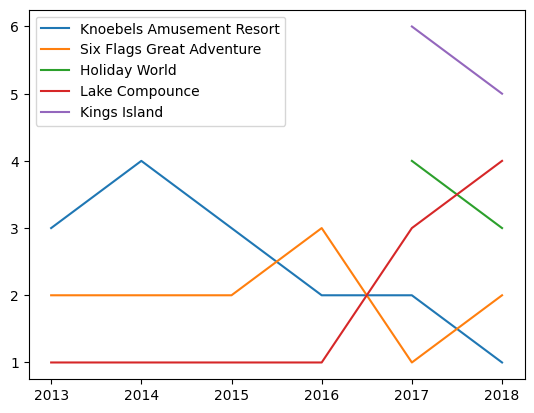

In [2]:
# 2
# Create a function to plot top n rankings over time

def create_line_chart (df, top_n):

  # Check frequency Name/Park over the years
  freq_name = df[['Name', 'Park']].value_counts()

  # Max value from Year's column
  max_year = df['Year of Rank'].max()

  # Selecting df from last year
  df_from_max_year = df[df['Year of Rank'] == max_year]

  # Sorting df by Rank's column
  sorted_df = df_from_max_year.sort_values(by = 'Rank')

  # Selecting top n rank Name/Park combination from the last year
  top_n_rank_park = sorted_df.head(top_n).reset_index()

  # Creating lists of top_n names and parks
  lst_name = list(top_n_rank_park.loc[0:top_n, 'Name'])
  lst_park = list(top_n_rank_park.loc[0:top_n, 'Park'])

  # Selecting for top_n parks full history from source data frame (wood_rollercoasters)

  df = pd.DataFrame(index =  wood_rollercoasters['Year of Rank'].unique())


  for count in range(len(lst_name)):
    data_to_chart = wood_rollercoasters.loc[(wood_rollercoasters['Name'] == lst_name[count]) & (wood_rollercoasters['Park'] == lst_park[count])]
    name_of_park = data_to_chart['Park'].unique()
    data_to_chart.rename(columns = {'Rank': name_of_park[0]}, inplace = True)
    data_to_chart = data_to_chart[['Year of Rank', name_of_park[0]]]


    data_to_chart.set_index('Year of Rank', inplace = True)
    df = df.merge(data_to_chart, how = 'left', right_index = True, left_index= True)

    print(df)

  df.plot.line()


    # plt.plot(data_to_chart['Year of Rank'], data_to_chart['Rank'])
    # plt.show()



  # counts_park_over_year = df.groupby(['Year of Rank'])['Name'].count()
  # counts_park_over_year_1 = df['Year of Rank'].value_counts()
  # top_n_parks_name = freq_name.index[:top_n]
  # for park in top_n_parks_name:
  #   print(df[df['Name'] == park])
  # return freq_name.index[:top_n]
  return 1
print(create_line_chart(wood_rollercoasters, 5))



3. Now that you've visualized rankings over time, let's dive into the actual statistics of roller coasters themselves. [Captain Coaster](https://captaincoaster.com/en/) is a popular site for recording roller coaster information. Data on all roller coasters documented on Captain Coaster has been accessed through its API and stored in `roller_coasters.csv`. Load the data from the csv into a DataFrame and inspect it to gain familiarity with the data.

In [3]:
# 3
# load roller coaster data

# Load csv file to dataframe
roller_coaster = pd.read_csv('roller_coasters.csv')

# Head of data
print(roller_coaster.head())
print()

# Summary statistics
print(roller_coaster.describe())
print()

# Count not-null values
print(roller_coaster.info())
print()

# Count null values
print(roller_coaster.isna().sum())
print()

# Count unique values in each column
print(roller_coaster.nunique())
print()

            name material_type seating_type  speed  height  length  \
0       Goudurix         Steel     Sit Down   75.0    37.0   950.0   
1  Dream catcher         Steel    Suspended   45.0    25.0   600.0   
2     Alucinakis         Steel     Sit Down   30.0     8.0   250.0   
3       Anaconda        Wooden     Sit Down   85.0    35.0  1200.0   
4         Azteka         Steel     Sit Down   55.0    17.0   500.0   

   num_inversions     manufacturer            park            status  
0             7.0           Vekoma    Parc Asterix  status.operating  
1             0.0           Vekoma   Bobbejaanland  status.operating  
2             0.0         Zamperla    Terra Mítica  status.operating  
3             0.0  William J. Cobb  Walygator Parc  status.operating  
4             0.0           Soquet          Le Pal  status.operating  

             speed       height       length  num_inversions
count  1478.000000  1667.000000  1675.000000     2405.000000
mean     70.102842    26.72585

4. Write a function that plots a histogram of any numeric column of the roller coaster DataFrame. Your function should take a DataFrame and a column name for which a histogram should be constructed as arguments. Make sure to include informative labels that describe your visualization.

   Call your function with the roller coaster DataFrame and one of the column names.

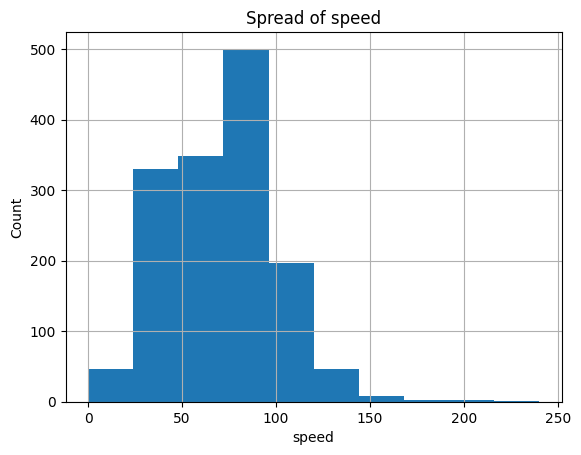

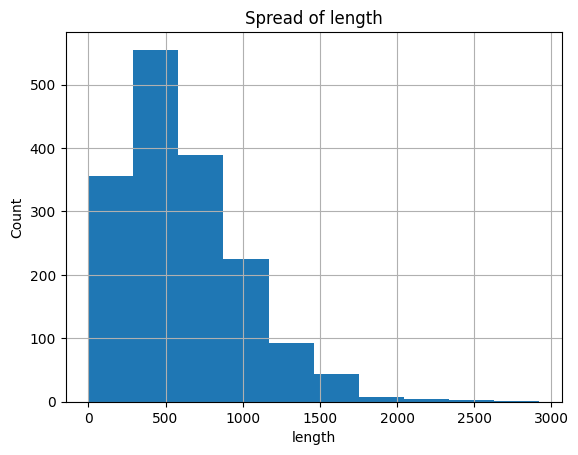

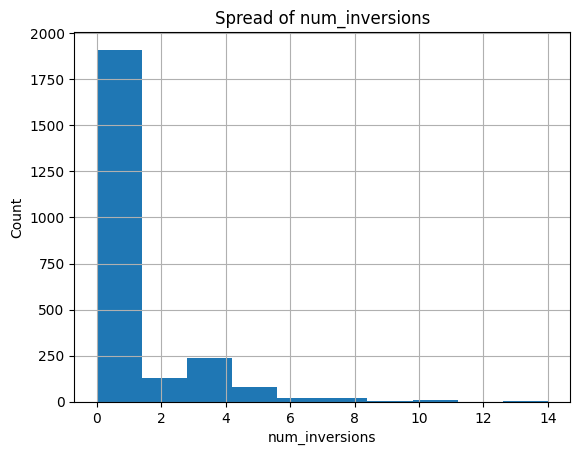

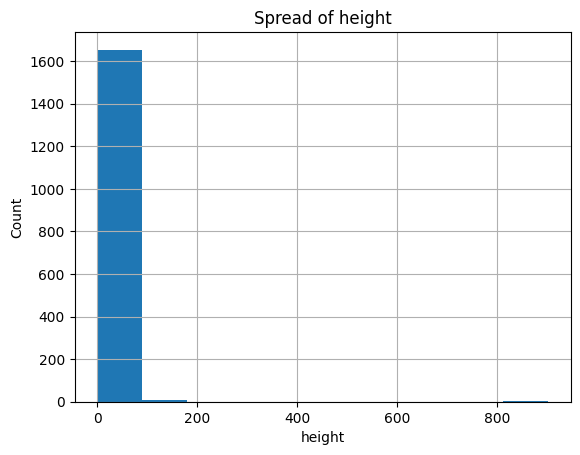

In [4]:
# 4
# Create a function to plot histogram of column values
def draw_hist(df, column):
  plt.clf()
  df[column].hist()
  plt.xlabel(column)
  plt.ylabel('Count')
  plt.title('Spread of ' + column)
  plt.show()



# Create histogram of roller coaster speed
draw_hist(roller_coaster, 'speed')

# Create histogram of roller coaster length
draw_hist(roller_coaster, 'length')

# Create histogram of roller coaster number of inversions
draw_hist(roller_coaster, 'num_inversions')

# Create a function to plot histogram of height values
draw_hist(roller_coaster, 'height')



5. Write a function that creates a bar chart showing the number of inversions for each roller coaster at an amusement park. Your function should take the roller coaster DataFrame and an amusement park name as arguments. Make sure to include informative labels that describe your visualization.

   Call your function with the roller coaster DataFrame and amusement park name.

                name material_type seating_type  speed  height  length  \
3           Anaconda        Wooden     Sit Down   85.0    35.0  1200.0   
14             Comet         Steel     Sit Down   64.0    24.0     NaN   
1044  Family coaster         Steel     Sit Down    NaN     NaN     NaN   
1423     The Monster         Steel     Inverted   92.0    42.0  1200.0   
1533         Zig Zag         Steel     Sit Down   45.0    14.0   370.0   

      num_inversions     manufacturer            park  \
3                0.0  William J. Cobb  Walygator Parc   
14               3.0           Vekoma  Walygator Parc   
1044             0.0               na  Walygator Parc   
1423             6.0              B&M  Walygator Parc   
1533             0.0             Mack  Walygator Parc   

                        status  
3             status.operating  
14            status.operating  
1044          status.operating  
1423          status.operating  
1533  status.closed.definitely  


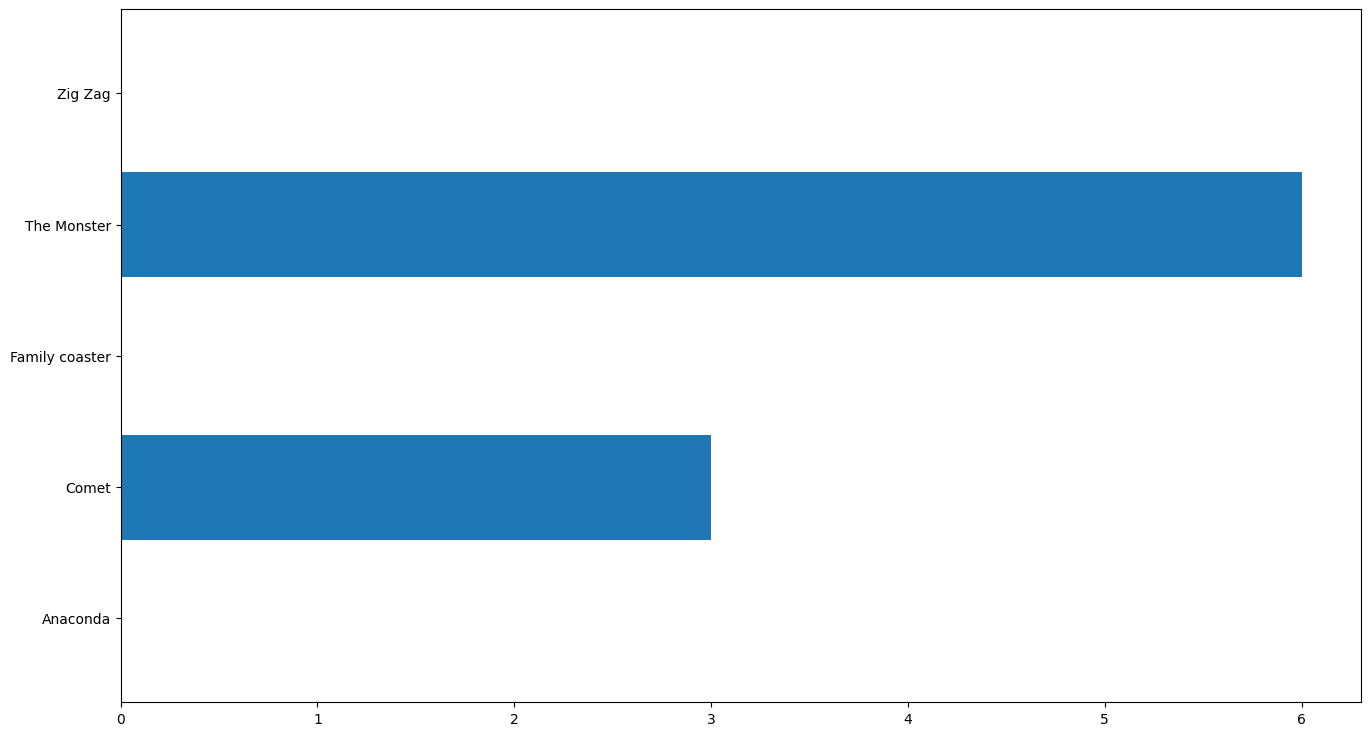

In [5]:
# 5
# Create a function to plot inversions by coaster at park
def plot_inversions_at_park(df, park):
  data = df[df['park'] == park]
  print(data)
  x_value = data.name
  y_value = data.num_inversions
  # Figure Size
  fig, ax = plt.subplots(figsize =(16, 9))
  # Horizontal Bar Plot
  ax.barh(x_value, y_value)
  # plt.bar(x_value, y_value)
  plt.show()

# Create barplot of inversions by roller coasters
plot_inversions_at_park(roller_coaster, 'Walygator Parc')

6. Write a function that creates a pie chart that compares the number of operating roller coasters (`'status.operating'`) to the number of closed roller coasters (`'status.closed.definitely'`). Your function should take the roller coaster DataFrame as an argument. Make sure to include informative labels that describe your visualization.

   Call your function with the roller coaster DataFrame.

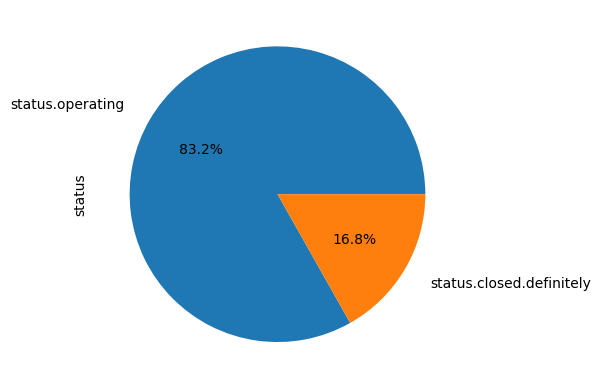

In [19]:
# 6
# Create a function to plot a pie chart of status.operating
# value_counts_roller = roller_coaster['status'].value_counts()
# print(value_counts_roller['status.operating'])
# print(value_counts_roller[0:2])

# value_counts_roller[0:2].plot.pie(autopct='%1.1f%%', labeldistance=1.6)


def plot_pie_chart(df):
  value_counts_roller = df['status'].value_counts()
  value_counts_roller[0:2].plot.pie(autopct='%1.1f%%', labeldistance=1.2)


# Create pie chart of roller coasters

plot_pie_chart(roller_coaster)

7. `.scatter()` is another useful function in matplotlib that you might not have seen before. `.scatter()` produces a scatter plot, which is similar to `.plot()` in that it plots points on a figure. `.scatter()`, however, does not connect the points with a line. This allows you to analyze the relationship between two variables. Find [`.scatter()`'s documentation here](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.scatter.html).

   Write a function that creates a scatter plot of two numeric columns of the roller coaster DataFrame. Your function should take the roller coaster DataFrame and two-column names as arguments. Make sure to include informative labels that describe your visualization.
   
   Call your function with the roller coaster DataFrame and two-column names.

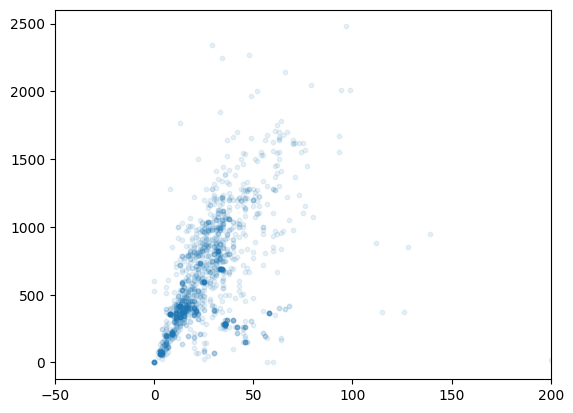

In [34]:
# 7
# Create a function to plot scatter of any two columns
plt.scatter(roller_coaster['height'], roller_coaster['length'], s = 10, alpha = 0.1)
plt.xlim(-50, 200)
plt.show()

# Create a function to plot scatter of speed vs height

# Create a scatter plot of roller coaster height by speed
